<a href="https://colab.research.google.com/github/alishermutalov/ML-learning/blob/ml/Predict_Diabet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [244]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [246]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [247]:
df.corrwith(df['Outcome'])

,0
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


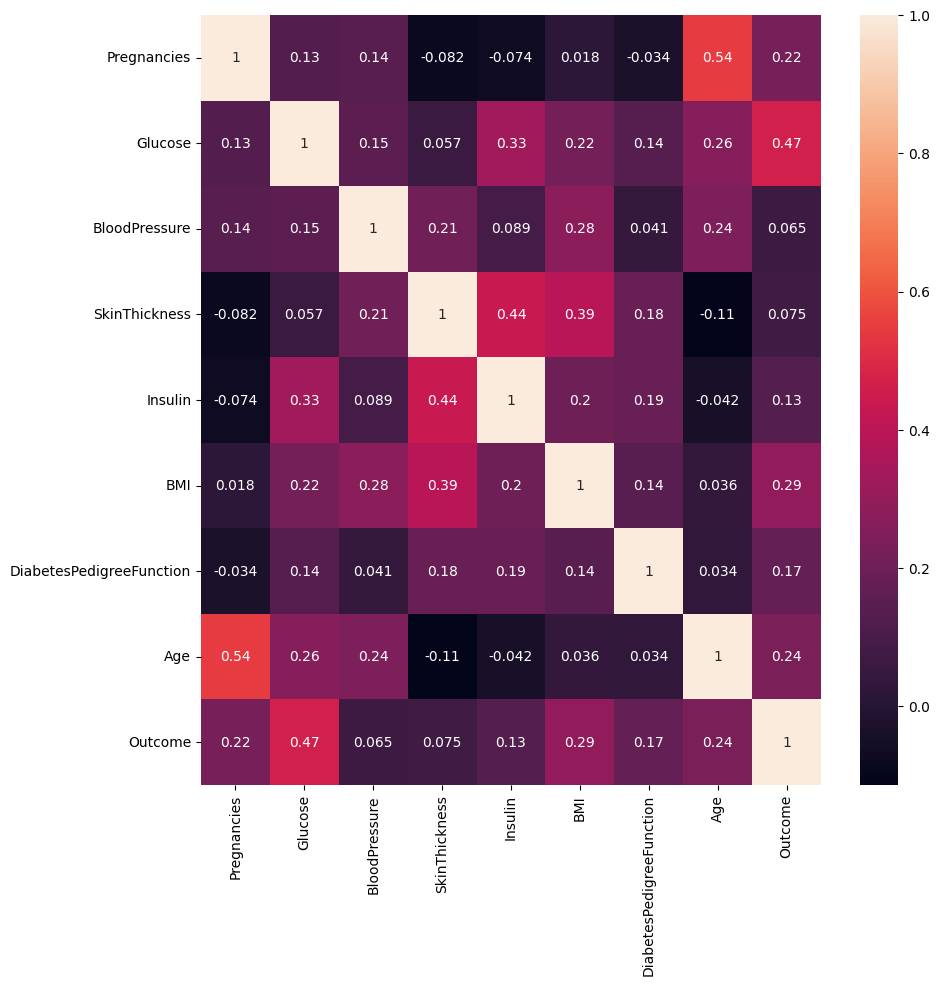

In [248]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [249]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [250]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [252]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

cv_grid = GridSearchCV(KNeighborsClassifier(), {'n_neighbors':np.arange(1,25)}, cv=5)
cv_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [253]:
knn = KNeighborsClassifier(n_neighbors=cv_grid.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [254]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        99
           1       0.70      0.55      0.61        55

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



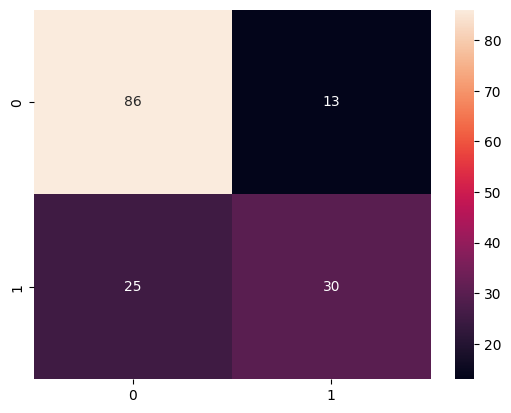

In [255]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

Biz model aniqligidan qoniqmadik va ma'lumotlarni tozalashga harakat qilamiz

In [256]:
X = df[['Glucose', 'BMI', 'Age']]
y = df['Outcome']

In [257]:
X = scaler.fit_transform(X)

In [258]:
cv_grid = GridSearchCV(KNeighborsClassifier(), {'n_neighbors':np.arange(1,25)}, cv=5)
cv_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [260]:
knn_model = KNeighborsClassifier(n_neighbors=cv_grid.best_params_['n_neighbors'])
knn_model.fit(X_train, y_train)
y_predict = knn_model.predict(X_test)

In [261]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



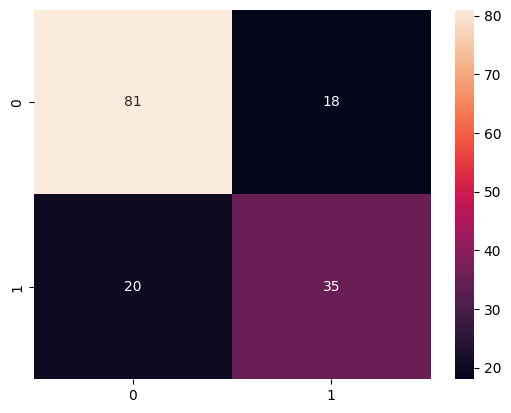

In [262]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

Modelning noaniqligi juda yuqori, shu sababli boshqa kamchiliklarni topib modelni qayta o'qitamiz

In [263]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


Ma'lumotlar orasida disbalance katta, uni bitta hajmga olib kelamiz!
Agar bizda imkoniyat bo'lsa diabet bilan kasallangan odamlar haqida ma'lumotlar yig'ishimiz kerak. Ammo bizda bunday imkoniyat yo'q. Shu sababli ortiqcha ma'lumotlarni o'chirib yuboramiz.

In [264]:
diabet = df[df['Outcome']==1]
healthy = df[df['Outcome']==0]
balanced_df = pd.concat([healthy.sample(diabet.shape[0]), diabet])
X_new = balanced_df.drop(['Outcome', 'SkinThickness', 'BloodPressure'], axis=1)
X_new = scaler.fit_transform(X_new)
y_new = balanced_df['Outcome']

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [266]:
grid = GridSearchCV(KNeighborsClassifier(), {'n_neighbors':np.arange(1,25)}, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [267]:
KNN_model = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
KNN_model.fit(X_train, y_train)
y_predict = KNN_model.predict(X_test)

In [268]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        59
           1       0.75      0.78      0.76        49

    accuracy                           0.78       108
   macro avg       0.78      0.78      0.78       108
weighted avg       0.78      0.78      0.78       108



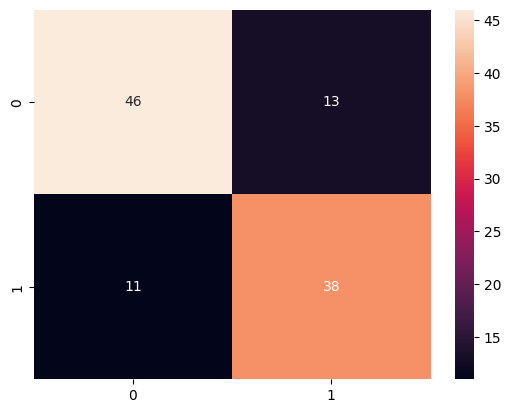

In [269]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()